<a href="https://colab.research.google.com/github/Jc-martinez95/Data_analysis_Portfolio/blob/main/Retail_sales_analysis/Retail_sales_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Retail Sales Analysis
By Juan Martinez

## Goal
The goal of this project is to answer common questions stated by stakeholders regarding data from a retail store

## Prepare

In [6]:
# Importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from itertools import combinations
from collections import Counter
import os



In [7]:
# Reading and concatenating all files

january= pd.read_csv('https://raw.githubusercontent.com/Jc-martinez95/Data_analysis_Portfolio/main/Retail_sales_analysis/Sales_January_2019.csv')
february= pd.read_csv('https://raw.githubusercontent.com/Jc-martinez95/Data_analysis_Portfolio/main/Retail_sales_analysis/Sales_February_2019.csv')
march= pd.read_csv('https://raw.githubusercontent.com/Jc-martinez95/Data_analysis_Portfolio/main/Retail_sales_analysis/Sales_March_2019.csv')
april= pd.read_csv('https://raw.githubusercontent.com/Jc-martinez95/Data_analysis_Portfolio/main/Retail_sales_analysis/Sales_April_2019.csv')
may= pd.read_csv('https://raw.githubusercontent.com/Jc-martinez95/Data_analysis_Portfolio/main/Retail_sales_analysis/Sales_May_2019.csv')
june= pd.read_csv('https://raw.githubusercontent.com/Jc-martinez95/Data_analysis_Portfolio/main/Retail_sales_analysis/Sales_June_2019.csv')
july= pd.read_csv('https://raw.githubusercontent.com/Jc-martinez95/Data_analysis_Portfolio/main/Retail_sales_analysis/Sales_July_2019.csv')
august= pd.read_csv('https://raw.githubusercontent.com/Jc-martinez95/Data_analysis_Portfolio/main/Retail_sales_analysis/Sales_August_2019.csv')
september= pd.read_csv('https://raw.githubusercontent.com/Jc-martinez95/Data_analysis_Portfolio/main/Retail_sales_analysis/Sales_September_2019.csv')
october= pd.read_csv('https://raw.githubusercontent.com/Jc-martinez95/Data_analysis_Portfolio/main/Retail_sales_analysis/Sales_October_2019.csv')
november= pd.read_csv('https://raw.githubusercontent.com/Jc-martinez95/Data_analysis_Portfolio/main/Retail_sales_analysis/Sales_November_2019.csv')
december= pd.read_csv('https://raw.githubusercontent.com/Jc-martinez95/Data_analysis_Portfolio/main/Retail_sales_analysis/Sales_December_2019.csv')

df = pd.concat([january,february,march,april,may,june,july,august,september,october,november,december])



## Process

In [8]:
# Data previsualization
df

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,141234,iPhone,1,700,01/22/19 21:25,"944 Walnut St, Boston, MA 02215"
1,141235,Lightning Charging Cable,1,14.95,01/28/19 14:15,"185 Maple St, Portland, OR 97035"
2,141236,Wired Headphones,2,11.99,01/17/19 13:33,"538 Adams St, San Francisco, CA 94016"
3,141237,27in FHD Monitor,1,149.99,01/05/19 20:33,"738 10th St, Los Angeles, CA 90001"
4,141238,Wired Headphones,1,11.99,01/25/19 11:59,"387 10th St, Austin, TX 73301"
...,...,...,...,...,...,...
25112,319666,Lightning Charging Cable,1,14.95,12/11/19 20:58,"14 Madison St, San Francisco, CA 94016"
25113,319667,AA Batteries (4-pack),2,3.84,12/01/19 12:01,"549 Willow St, Los Angeles, CA 90001"
25114,319668,Vareebadd Phone,1,400,12/09/19 06:43,"273 Wilson St, Seattle, WA 98101"
25115,319669,Wired Headphones,1,11.99,12/03/19 10:39,"778 River St, Dallas, TX 75001"


In [9]:
# Creating the month column, parsing the two first characters in Order Date 
df['month'] = df['Order Date'].str[0:2]

In [10]:
# Checking data types
df.dtypes

Order ID            object
Product             object
Quantity Ordered    object
Price Each          object
Order Date          object
Purchase Address    object
month               object
dtype: object

## Cleaning

In [11]:
# Dropping null values
df[df.isnull().any(axis=1)]

df = df.dropna(how='all')

In [12]:
# Getting rid of the 'Or' in Order Date
df = df[df['Order Date'].str[0:2] != 'Or']
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,month
0,141234,iPhone,1,700,01/22/19 21:25,"944 Walnut St, Boston, MA 02215",01
1,141235,Lightning Charging Cable,1,14.95,01/28/19 14:15,"185 Maple St, Portland, OR 97035",01
2,141236,Wired Headphones,2,11.99,01/17/19 13:33,"538 Adams St, San Francisco, CA 94016",01
3,141237,27in FHD Monitor,1,149.99,01/05/19 20:33,"738 10th St, Los Angeles, CA 90001",01
4,141238,Wired Headphones,1,11.99,01/25/19 11:59,"387 10th St, Austin, TX 73301",01


In [13]:
# Transforming data types
df['Quantity Ordered'] = pd.to_numeric(df['Quantity Ordered'])
df['Price Each'] = df['Price Each'].astype('float')
df['Order Date'] = pd.to_datetime(df['Order Date'])

In [14]:
# Adding sales column
df['sales'] = df['Quantity Ordered'] * df['Price Each']
df['sales'].head()

0    700.00
1     14.95
2     23.98
3    149.99
4     11.99
Name: sales, dtype: float64

## Analysis and Share

### What was the best month for sales?

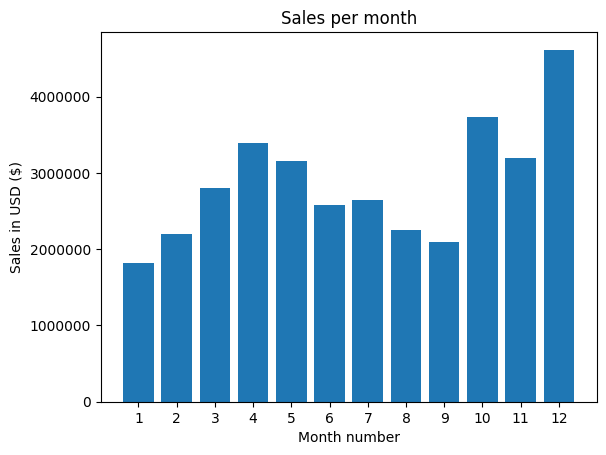

In [15]:
# Groupping by month
results = df.groupby('month').sum(numeric_only=True)

# Plotting the results
months = range(1,13)
plt.bar(months, results['sales'])

plt.xticks(months)
plt.ylabel('Sales in USD ($)')
plt.ticklabel_format(useOffset=False, style = 'plain')
plt.xlabel('Month number')
plt.title('Sales per month')
plt.show()


The months of October and December are amongst the best in term of sales

### What city had the highest number of sales?

In [16]:
# Adding a city column
def get_city(address):
  return address.split(',')[1]

def get_state(address):
  return address.split(',')[2].split(' ')[1]


df['city'] = df['Purchase Address'].apply(lambda x: f"{get_city(x)}, {get_state(x)}" )

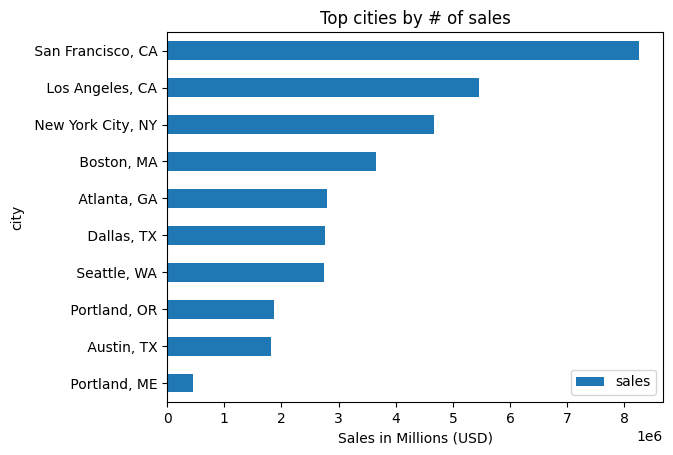

In [17]:
# Groupping by city and plotting the results

df.groupby('city').sum(numeric_only=True).sort_values(by='sales', ascending=True).plot(kind='barh',y='sales')

plt.xlabel('Sales in Millions (USD)')
plt.title('Top cities by # of sales')
plt.show()


We can see that the cities with the highest number of sales are located in California

### At what time should we display adverstisements to maximize likelihood of customer's buying product?

In [18]:
# Creating hour and minute columns
df['hour'] = df['Order Date'].dt.hour
df['minute'] = df['Order Date'].dt.minute

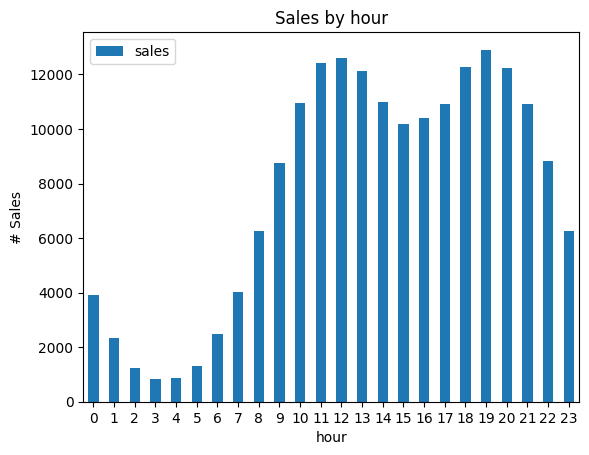

In [19]:
# Groupping by hour and plotting the results

df.groupby('hour').count().plot(kind='bar',y='sales',rot=0)

plt.ylabel('# Sales')
plt.title('Sales by hour')
plt.show()


We can see two peaks, one between 11:00 - 13:00 and the other between 18:00 and 20:00 hours 

### What products are most often sold together?

In [20]:
# Looking for duplicate orders
df_duplicates = df[df['Order ID'].duplicated(keep=False)] # keep=False to keep all the duplicates

# Concatenating products with duplicated order ID
df_duplicates['grouped'] = df_duplicates.groupby('Order ID')['Product'].transform(lambda x: ','.join(x))

# Dropping the duplicate concatenation
df_2_item = df_duplicates[['Order ID', 'grouped']].drop_duplicates()

<ipython-input-20-fa32d1b5ad3d>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_duplicates['grouped'] = df_duplicates.groupby('Order ID')['Product'].transform(lambda x: ','.join(x))


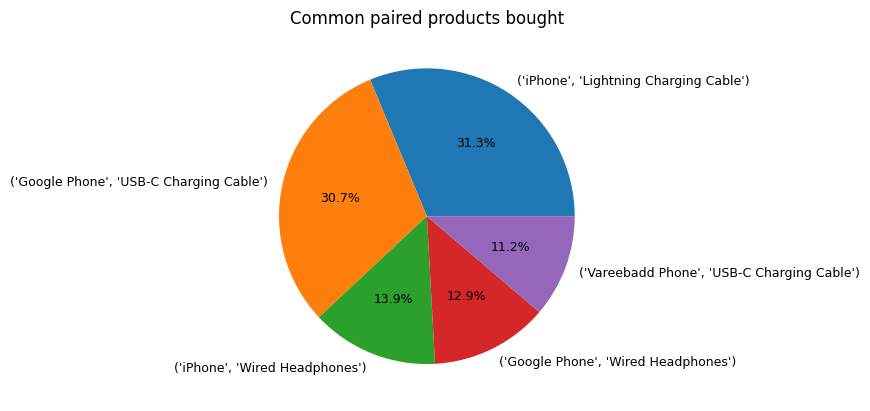

In [103]:
# Counting the possible combinations
count = Counter()
for row in df_2_item['grouped']:
  row_list = row.split(',')
  count.update(Counter(combinations(row_list, 2)))

# Showing results, top 10 most combo items sold together
pairs = {}
for key, value in count.most_common(10):
  pairs[key]=value

pairs = pd.DataFrame.from_dict(data=dictio,orient='index',columns=['quantity']).reset_index().rename(columns={'index':'product_pairs'})

pairs.head(5).plot(kind='pie',y='quantity',labels=pairs['product_pairs'],legend=None,autopct='%1.1f%%',fontsize=9)
plt.ylabel('')
plt.title('Common paired products bought')
plt.show()

The combos Iphone and Google phone along with charging cables represent 60% of the most common paired products sold 

### What product sold the most?

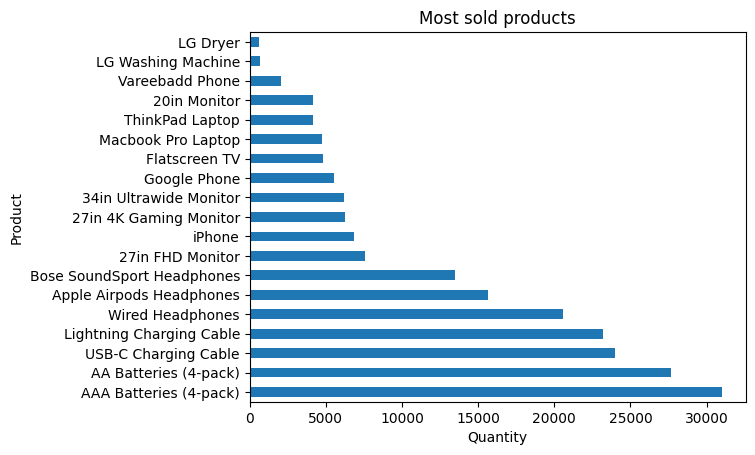

In [104]:
# Groupping by product and showing results

df.groupby('Product').sum(numeric_only=True)['Quantity Ordered'].sort_values(ascending=False).plot(kind='barh')
plt.xlabel('Quantity')
plt.title('Most sold products')
plt.show()

This graph shows batteries, charging cables and headphones as the most sold products

### Why did that product sold the most?

In [105]:
# Creating grouping variables for products and prices

products = df.groupby('Product').sum(numeric_only=True)['Quantity Ordered']
prices = df.groupby('Product').mean(numeric_only=True)['Price Each']

# Turning the variables into Data Frames
prices = pd.DataFrame(prices)
products = pd.DataFrame(products)


# Joining both Data Frames into one
prod_price = products.join(prices)

<ipython-input-24-8bca30b905b6>:11: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(prod_price.index,rotation='vertical')


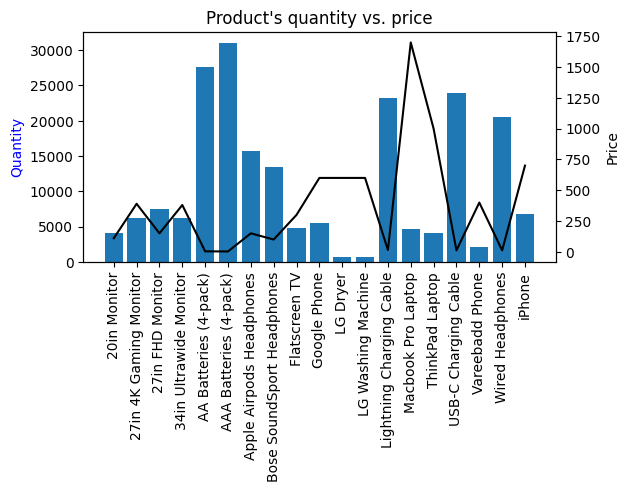

In [24]:
# Showing the results

fig, ax1 = plt.subplots()

ax2 = ax1.twinx()
ax1.bar(x=prod_price.index, height=prod_price['Quantity Ordered'])
ax2.plot(prod_price.index, prod_price['Price Each'],color='k')

ax1.set_ylabel('Quantity', color='b')
ax2.set_ylabel('Price',color='k')
ax1.set_xticklabels(prod_price.index,rotation='vertical')
plt.tight_layout()
plt.title("Product's quantity vs. price" )
plt.show()

As you can see, generally the products which have lower prices, have a greater demand

## Conclusion:
My analysis has provided insights of the retail data, answering the questions posted by the stakeholders